# Escenario 3

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Cargando tweets

In [5]:
tweets_df = pd.read_csv('./data/tweets_labeled.csv', sep = ',')

In [6]:
tweets_df.shape

(648, 3)

In [7]:
tweets_df.head()

,full_text,sentiment,emotion
0,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,@AlvaroUribeVel Ellos también celebran por que Maduro PetroGustavo Ivan Cepeda Timo Teodora Bobolivar entre muchos más sufren de insomnio.\nUribe Velez Alvarito no los deja dormir\nEl enemigo para las elecciones no es Fico.... Sino el Excelentísimo y más Grande Presidente que ha tenido Colombia,negative,anger
2,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",negative,anger
3,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir 😂 https://t.co/k56Dv7id1J,negative,joy
4,"#OtraPregunta \n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\nEsto no pinta nada bien... y si además gana Lula en Brasil...\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",negative,fear


In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.413580
NaN         0.371914
neutral     0.171296
positive    0.043210
Name: sentiment, dtype: float64

In [9]:
tweets_df['emotion'].value_counts(dropna = False, normalize = True)

NaN        0.433642
anger      0.277778
joy        0.137346
fear       0.104938
sadness    0.046296
Name: emotion, dtype: float64

### Cargando textos

In [10]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [11]:
tweets_labeled_df.shape

(407, 3)

In [12]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [13]:
tweets_unlabeled_df.shape

(241, 3)

In [14]:
tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

C:\Users\Oscar\AppData\Local\Temp\ipykernel_4296\3423825563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})


### Entrenando datasets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [16]:
X_train.shape

(325,)

In [17]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.658462
positive    0.341538
Name: sentiment, dtype: float64

In [18]:
X_test.shape

(82,)

In [19]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.658537
positive    0.341463
Name: sentiment, dtype: float64

### Vectorizando texto

In [20]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [21]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [22]:
X_bow = bow.fit_transform(X_train)

In [23]:
X_tfidf = tfidf.fit_transform(X_train)

### BOW

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [26]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

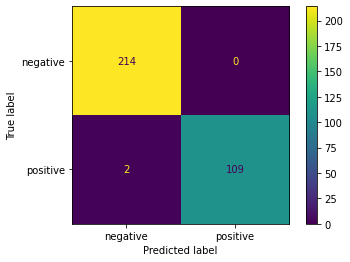

In [27]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

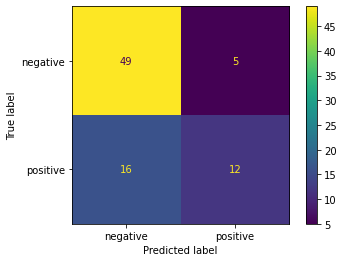

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [29]:
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

Precision: 0.7058823529411765
Recall: 0.42857142857142855
F1: 0.5333333333333333


### TF-IDF

# Con RandomForestClassifier

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [32]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

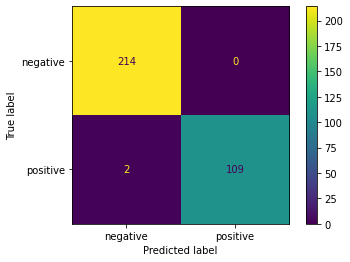

In [33]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

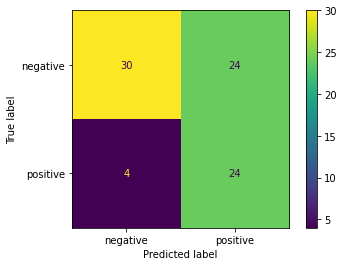

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [35]:
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

Precision: 0.7058823529411765
Recall: 0.42857142857142855
F1: 0.5333333333333333


In [36]:
model = RandomForestClassifier(200)

In [37]:
model.fit(X_tfidf, y_train)

RandomForestClassifier(n_estimators=200)

In [38]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

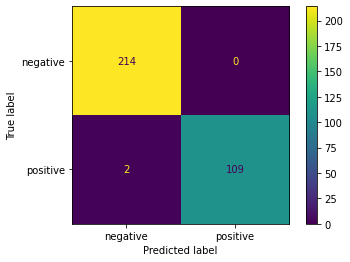

In [39]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

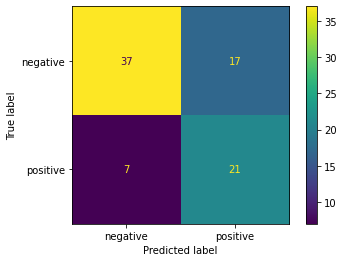

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [41]:
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

Precision: 0.7058823529411765
Recall: 0.42857142857142855
F1: 0.5333333333333333


In [42]:
model = RandomForestClassifier(300)

In [43]:
model.fit(X_tfidf, y_train)

RandomForestClassifier(n_estimators=300)

In [44]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

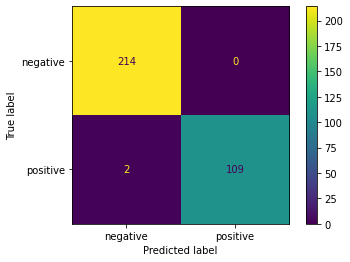

In [45]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

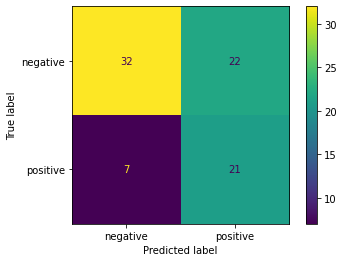

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [47]:
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

Precision: 0.7058823529411765
Recall: 0.42857142857142855
F1: 0.5333333333333333


# Con DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier()

In [49]:
model.fit(X_tfidf, y_train)

DecisionTreeClassifier()

In [50]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

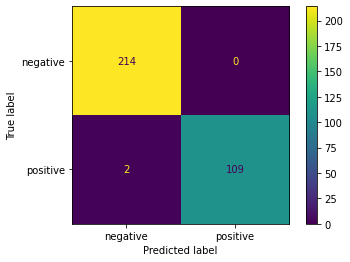

In [51]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

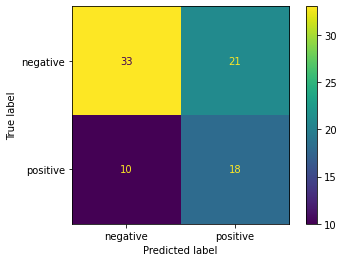

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [53]:
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

Precision: 0.7058823529411765
Recall: 0.42857142857142855
F1: 0.5333333333333333


# Con SVC

In [54]:
model = SVC()

In [55]:
model.fit(X_tfidf, y_train)

SVC()

In [56]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

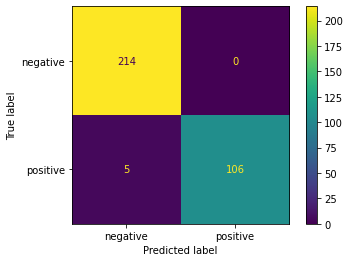

In [57]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

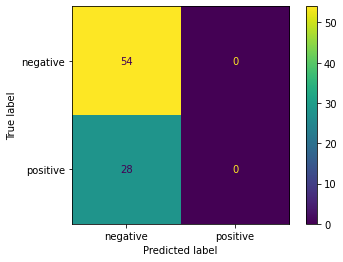

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [59]:
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

Precision: 0.7058823529411765
Recall: 0.42857142857142855
F1: 0.5333333333333333


### Analizando errores

In [60]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [61]:
error_df.shape

(82, 3)

In [62]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(len(error_df))

,full_text,actual,predicted
3,"Tres semanas para unas elecciones claves en Colombia: @petrogustavo encabeza las encuestas, el lunes denunció un plan para asesinarlo. En segundo lugar está Gutiérrez, aliado al uribismo, que busca llegar al balotaje. El análisis para @CarasyCaretasuy. \n\nhttps://t.co/HDd8ACTHI6",positive,negative
5,"Le pedí a ⁦@ElyangelicaNews⁩ , destacada periodista venezolana en el exilio, que le hablara a Colombia y nos contara sobre su país y nuestras elecciones. Esta es una #CartaDesdeElFururo \n\nMi columna en ⁦@RevistaSemana⁩ 👇🏻 https://t.co/ZJAOCFSEMj",positive,negative
17,"🇨🇴 El próximo domingo 29 de mayo, #Colombia tendrá su jornada de elecciones presidenciales. Aquí te contamos cuáles son las propuestas de tecnología y transformación digital de los 8 candidatos. 🌐👇\nhttps://t.co/ddIaxzHUtS",positive,negative
21,"En #QuímicaEnLaFórmula, la candidata Ingrid Betancourt contó qué tanto sabe de su fórmula, en el camino a la Presidencia de Colombia ⬇️ https://t.co/KTgkWN1G2H",positive,negative
22,Las próximas elecciones en Colombia. Demócrata. https://t.co/MolYppvL8o,positive,negative
25,"Un abrazo fuerte @CamiloRomero en próximas elecciones espero que mi voto sea por Usted, desde el cielo tu madre iluminará ese camino, y el de Colombia hoy.❤️ https://t.co/IiVUDKZpb0",positive,negative
26,"La cuenta regresiva para las elecciones presidenciales de Colombia se encuentra en su recta final, y el candidato que cuenta de acuerdo a la encuestas con mayor intención de votos es Gustavo Petro #7May https://t.co/JVyQw3MCv7",positive,negative
27,Que mierda que los favoritos a ganar las elecciones tengan todos escándalos de corrupcion XDD ay mi Colombia,negative,positive
32,"Con esta ley, que se intentó modificar varias veces en anteriores contiendas, la intención principal era asegurar que las campañas electorales se llevaran a cabo en condiciones igualitarias y transparentes.\n\n#Elecciones2022 #ColombiaDecide \nhttps://t.co/qRNy77hLm6",positive,negative
42,“La Procuraduría General de Colombia descubrió que 2925 aspirantes a jurados de votación para las presidenciales del próximo 29 de mayo están inhabilitados para ejercer funciones públicas” https://t.co/2MCo0SBpog #Elecciones 🇨🇴 por @gabrielamor,negative,positive
